In [198]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import MinMaxScaler,StandardScaler
from statsmodels.stats import weightstats
# from sklearn.preprocessing import QuantileTransformer
from scipy.stats import pointbiserialr

## Resampling Libary
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

## Model library
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')


## Hypothesis testing Library
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.feature_selection import chi2
from scipy.stats import f_oneway

## Imbalanced data sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification

### Feature selection
from sklearn.feature_selection import SequentialFeatureSelector


In [2]:
df=pd.read_csv(r"C:\Users\mayur\Downloads\bank_currupt.csv")

In [3]:
pd.set_option('display.max_columns', 500) # This will display maximum 500 columns
pd.set_option('display.max_rows', 500)

In [4]:
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)   Operating Expense Rate  \
0                               0.780985             1.256969e-04   
1                               0.781506             2.897851e-04   
2                               0.780284             2.361297e-04   
3                               0.781241             1.078888e-04   
4                               0.781550             7.890000e+09   

    Research and development expense rate   Cash flow rate  \
0                                     0.0         0.458143   
1                                     0.0         0.461867   
2                              25500000.0         0.458521   
3                                     0.0         0.465705   
4                                     0.0         0.462746   

    Interest-bearing debt interest rate   Tax rate (A)  \
0                              0.000725            0.0   
1                              0.000647            0.0   
2                              0.000790            0.0   
3                              0.000449            0.0   
4                              0.000686            0.0   

    Net Value Per Share (B)   Net Value Per Share (A)  \
0                  0.147950                  0.147950   
1                  0.182251                  0.182251   
2                  0.177911                  0.177911   
3                  0.154187                  0.154187   
4                  0.167502                  0.167502   

    Net Value Per Share (C)   Persistent EPS in the Last Four Seasons  \
0                  0.147950                                  0.169141   
1                  0.182251                                  0.208944   
2                  0.193713                     

# Data Understanding and preprocessing

In [5]:
## We check information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
#### Now we can remove whitespaces of columns 
df.columns=df.columns.str.strip()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

In [8]:
# Changed the Bankrupt column name to make input easier
df = df.rename(columns={'Bankrupt?': 'Bankrupt'})

In [9]:
## Now we check the duplicate values from the data
df[df.duplicated()].count()

## It seems like there is no duplicates value

Bankrupt                                                   0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
Realized Sales Gross Margin                                0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
After-tax net Interest Rate                                0
Non-industry income and expenditure/revenue                0
Continuous interest rate (after tax)                       0
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Interest-bearing debt interest rate                        0
Tax rate (A)                                               0
Net Value Per Share (B) 

In [10]:
## Now we can check the null values 
df.isna().sum()
## There is no null values in data 

Bankrupt                                                   0
ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
Realized Sales Gross Margin                                0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
After-tax net Interest Rate                                0
Non-industry income and expenditure/revenue                0
Continuous interest rate (after tax)                       0
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Interest-bearing debt interest rate                        0
Tax rate (A)                                               0
Net Value Per Share (B) 

##### Now we can check the outliers in data

In [11]:
df.columns

Index(['Bankrupt', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax 

In [12]:
## 1st we create dataframe for only continous data
df1=df.drop(['Bankrupt','Liability-Assets Flag','Net Income Flag'],axis=1)

In [13]:
outlier_columns = []
threshold=1.5

for col in df1.columns:
    if df[col].dtype.kind in 'bifc':  # Check if the column is numeric
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)
print(outlier_columns)
print(len(outlier_columns))

['ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Total Asset Growth Rate', 'Net Value Growth Rate', 'Total A

In [14]:
## These are the outlier  are present in 88 columns. so we want to handel outliers 

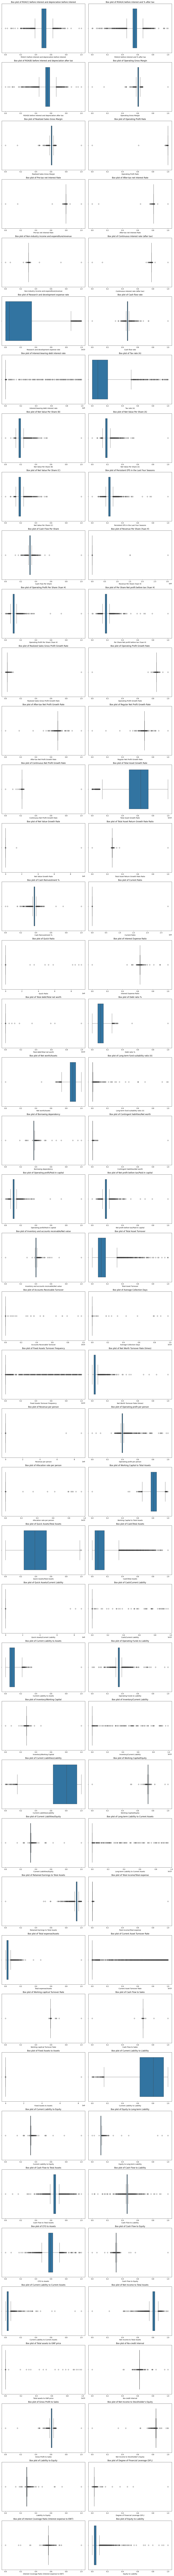

In [15]:
## To detect outlier we also plot box plot 
def plot_box_plots(df1, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # Number of rows for the subplots grid

    plt.figure(figsize=(15, 5 * num_rows))

    for i, col in enumerate(columns, 1):
        plt.subplot(num_rows, 2, i)
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col}')

    plt.tight_layout()
    plt.show()

plot_box_plots(df1,outlier_columns)

##### Now we can hadnel this outliers by imputation technique

In [16]:
## This is function which is used to handel outliers here we impute outliers by using ub and lb
def impute(x):
    Q3=df[x].quantile(0.75)
    Q1=df[x].quantile(0.25)
    IQR=Q3-Q1
    lb=Q1-1.5*(IQR)
    ub=Q3+1.5*(IQR)
    idx=np.where(df[x]>ub)
    df[x].iloc[idx]=ub
    idx=np.where(df[x]<lb)
    df[x].iloc[idx]=lb

In [17]:
cnt=0
for col in df.columns:
    if col in outlier_columns:
        impute(col)

## Outliers are impute by using lower bound and upper bound

In [18]:
df1=df.drop(['Bankrupt','Liability-Assets Flag','Net Income Flag'],axis=1)

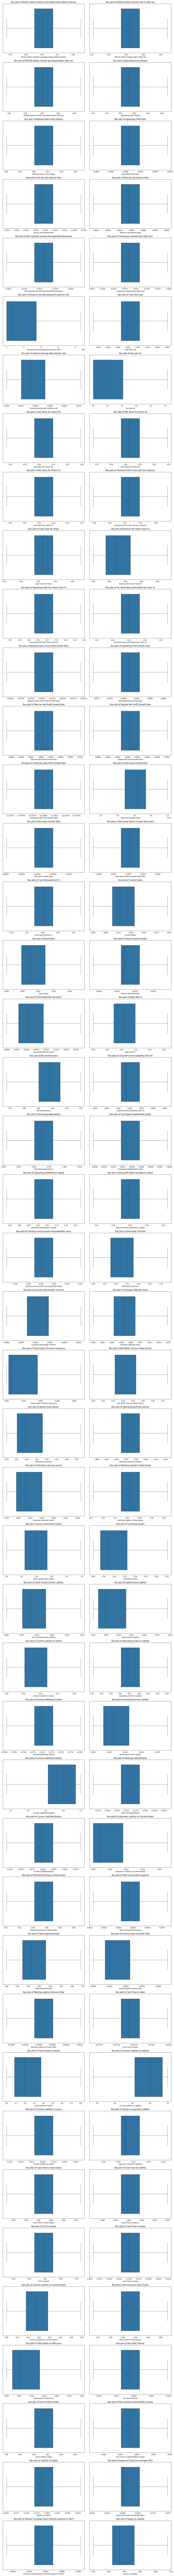

In [19]:
## now againg we check outliers are present or not using boxplot
## To detect outlier we also plot box plot 
def plot_box_plots(df1, columns):
    num_columns = len(columns)
    num_rows = (num_columns + 1) // 2  # Number of rows for the subplots grid

    plt.figure(figsize=(15, 5 * num_rows))

    for i, col in enumerate(columns, 1):
        plt.subplot(num_rows, 2, i)
        sns.boxplot(x=df[col])
        plt.title(f'Box plot of {col}')

    plt.tight_layout()
    plt.show()

plot_box_plots(df1,outlier_columns)

#### From above Box plot we saw that the outliers are get handel 

# EDA

In [31]:
df1=df.drop(['Bankrupt','Liability-Assets Flag','Net Income Flag'],axis=1)

In [32]:
## Now we calculate the descriptive statistic of all continous columns 
df1.describe()

ROA(C) before interest and depreciation before interest  \
count                                        6819.000000         
mean                                            0.505667         
std                                             0.051483         
min                                             0.387973         
25%                                             0.476527         
50%                                             0.502706         
75%                                             0.535563         
max                                             0.624116         

       ROA(A) before interest and % after tax  \
count                             6819.000000   
mean                                 0.560507   
std                                  0.050087   
min                                  0.455122   
25%                                  0.535543   
50%                                  0.559802   
75%                                  0.589157   
max                                  0.669579   

       ROA(B) before interest and depreciation after tax  \
count                                        6819.000000   
mean                                            0.554691   
std                                             0.050277   
min                                             0.442034   
25%                                             0.527277   
50%                                             0.552278   
75%                                             0.584105   
max                                             0.669348   

       Operating Gross Margin  Realized Sales Gross Margin  \
count             6819.000000                  6819.000000   
mean                 0.607834                     0.607812   
std                  0.010758                     0.010725   
min                  0.580240                     0.580321   
25%                  0.600445                     0.600434   
50%                  0.605997                     0.605976   
75%                  0.613914                     0.613842   
max                  0.634118                     0.633954   

       Operating Profit Rate  Pre-tax net Interest Rate  \
count            6819.000000                6819.000000   
mean                0.999028                   0.797467   
std                 0.000120                   0.000189   
min                 0.998781                   0.797096   
25%                 0.998969                   0.797386   
50%                 0.999022                   0.797464   
75%                 0.999095                   0.797579   
max                 0.999282                   0.797868   

       After-tax net Interest Rate  \
count                  6819.000000   
mean                      0.809378   
std                       0.000157   
min                       0.809075   
25%                       0.809312   
50%                       0.809375   
75%                       0.809469   
max                       0.809706   

       Non-industry income and expenditure/revenue  \
count                                  6819.000000   
mean                                      0.303526   
std                                       0.000124   
min                                       0.303288   
25%                                       0.303466   
50%                                       0.303525   
75%                                       0.303585   
max                                       0.303764   

       Continuous interest rate (after tax)  Operating Expense Rate  \
count                           6819.000000            6.819000e+03   
mean                               0.781637            1.995347e+09   
std                                0.000166            3.237684e+09   
min                                0.781314            0.000000e+00   
25%                                0.781567            1.566874e-04   
50%                                0.781635            2.777589e-04   
75%        

Bankrupt
0    6599
1     220
Name: count, dtype: int64


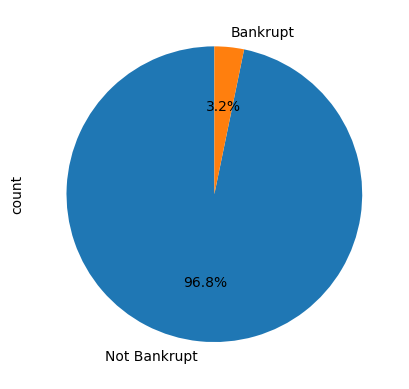

In [17]:
## Here Bankrupt is our Target variable 
df.Bankrupt.value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90, labels=['Not Bankrupt', 'Bankrupt'])
print(df['Bankrupt'].value_counts())

In [19]:
## Here Target varianble is 0 aand 1 so here 0 is Not Bankrupt and 1 is Bankrupt
## The Not Bankrupt i.e. 0's are 6599
## The Bankrupt i.e. 1's are 220
## Here we see that the our target variabel is unbalanced most of the values are of Not Bankrupt means 0 
## Data is unblanced so we want to balanced it.

In [20]:
# There are 3 categorical columns i.e Bankrupt,Liability-Assets Flag,Net Income Flag,
# So we can check relation between these 3 columns 

Liability-Assets Flag
0    6811
1       8
Name: count, dtype: int64


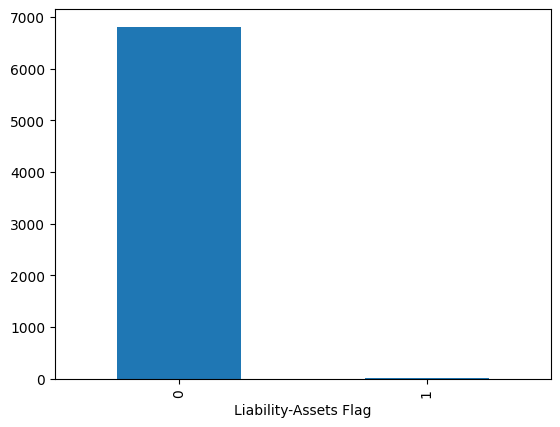

In [22]:
## 1.Bankrupt and Liability-Assets Flag
df['Liability-Assets Flag'].value_counts().plot(kind='bar')
print(df['Liability-Assets Flag'].value_counts())

In [23]:
## It will show that if total liabilities exceed total assets, the marked value is 1, otherwise the value is 0. 

Liability-Assets Flag  Bankrupt
0                      0           6597
                       1            214
1                      1              6
                       0              2
Name: count, dtype: int64


<Axes: xlabel='Liability-Assets Flag', ylabel='count'>

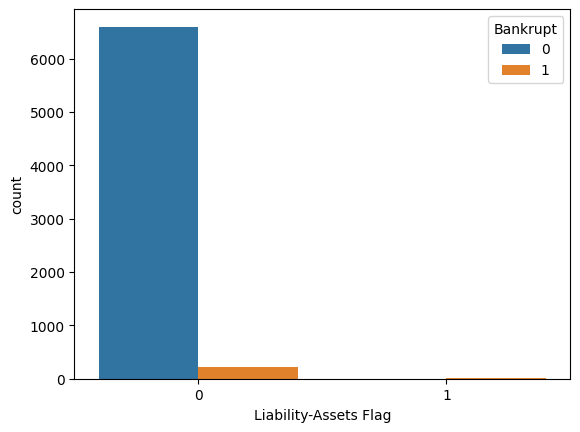

In [24]:
print(df[['Liability-Assets Flag','Bankrupt']].value_counts())
sns.countplot(x = 'Liability-Assets Flag',hue = 'Bankrupt',data = df)

In [25]:
## A small percentage of bank go bankrupt,even though they have more assets than liabilities.

In [26]:
## 2. Bankrupt and Net Income Flag

<Axes: xlabel='Net Income Flag'>

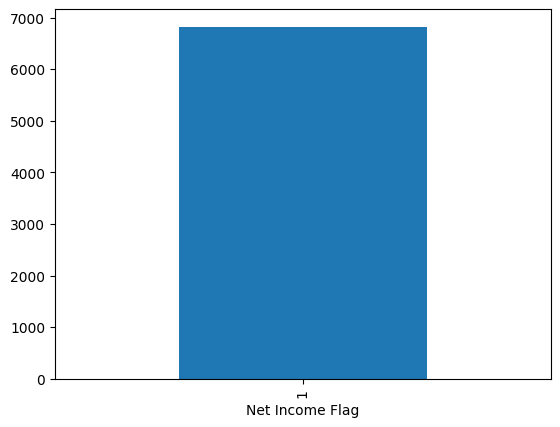

In [30]:
df['Net Income Flag'].value_counts().plot(kind='bar')

In [31]:
## Net Income Flag' shows the net income is negative, the flagged value is 1
## It show only values of 1


In [32]:
df.head()

Bankrupt  ROA(C) before interest and depreciation before interest  \
0         1                                           0.370594         
1         1                                           0.464291         
2         1                                           0.426071         
3         1                                           0.399844         
4         1                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.424389   
1                                0.538214   
2                                0.499019   
3                                0.451265   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.405750                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998700   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.796887                     0.808809   
1                   0.797380                     0.809301   
2                   0.796403                     0.808388   
3                   0.796967                     0.808966   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  \
0                                     0.302646   
1                                     0.303556   
2                                     0.302035   
3                                     0.303350   
4                                     0.303475   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.780985            1.256969e-04   
1                              0.781506            2.897851e-04   
2                              0.780284            2.361297e-04   
3                              0.781241            1.078888e-04   
4                              0.781550            7.890000e+09   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.169141             0.311664   
1                                 0.208944             0.318137   
2                       

In [25]:
# Average Profit Margin Based on Bankruptcy:
# Group the data based on the 'Bankrupt' label and calculate the average for the profit margin feature. 
# This can provide insight into how profit margins relate to the likelihood of bankruptcy.

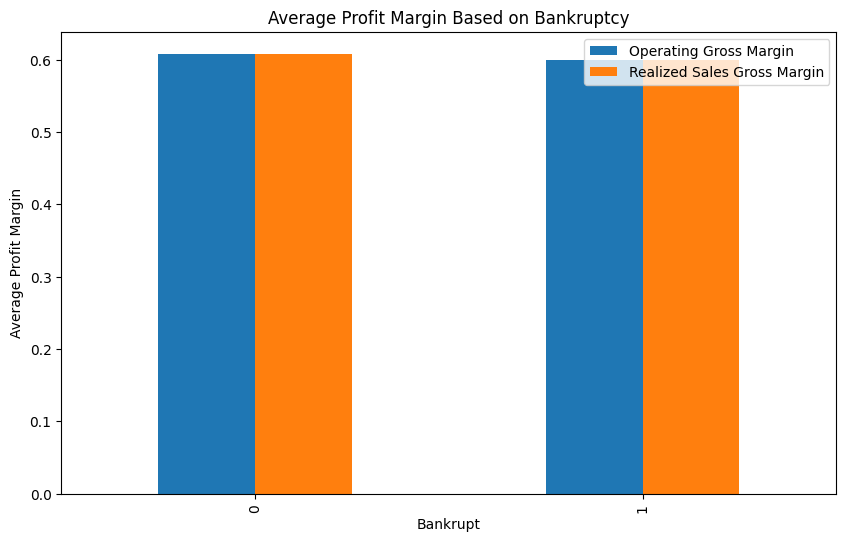

Operating Gross Margin  Realized Sales Gross Margin
Bankrupt                                                     
0                       0.608109                     0.608084
1                       0.599583                     0.599632

In [26]:
grouped_data_profit = df.groupby('Bankrupt')[['Operating Gross Margin', 'Realized Sales Gross Margin']].mean()
grouped_data_profit.plot(kind='bar', figsize=(10, 6))
plt.title('Average Profit Margin Based on Bankruptcy')
plt.ylabel('Average Profit Margin')
plt.show()
grouped_data_profit

#### Now we plot the distribution plot of all continous variables

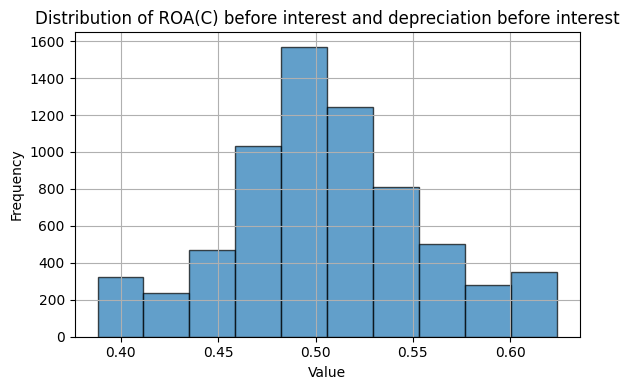

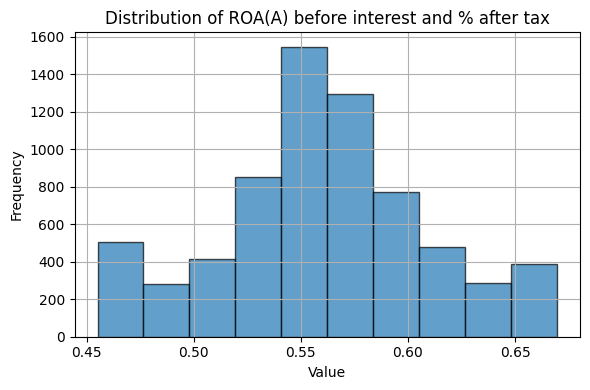

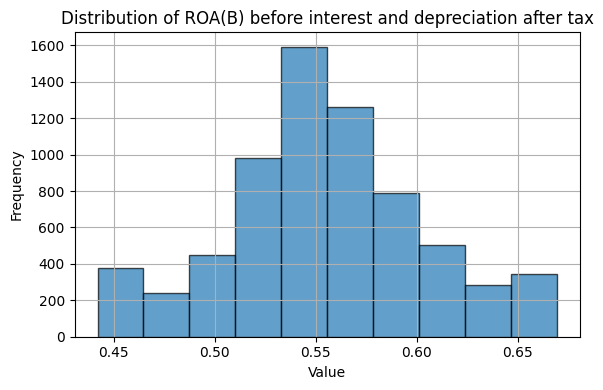

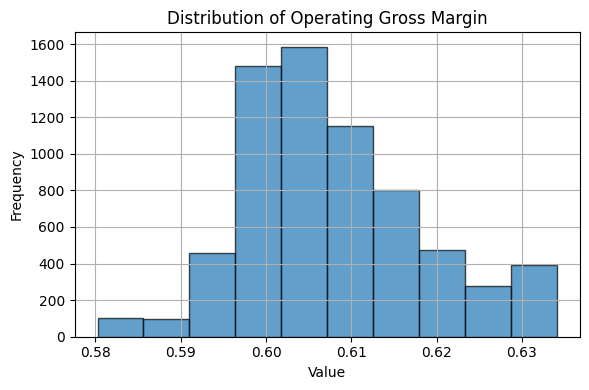

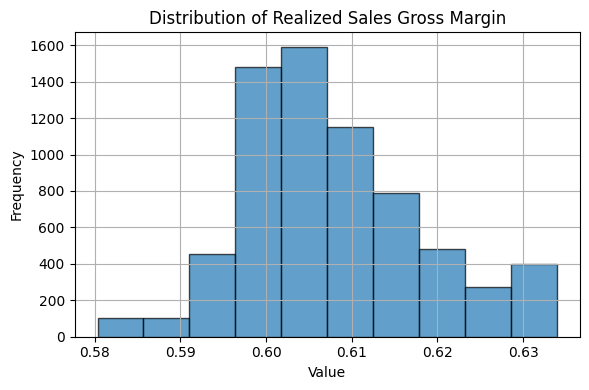

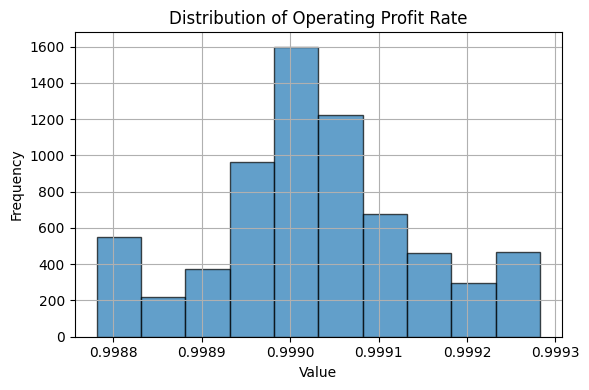

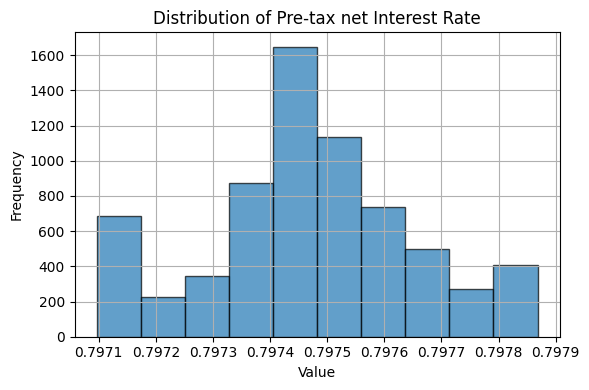

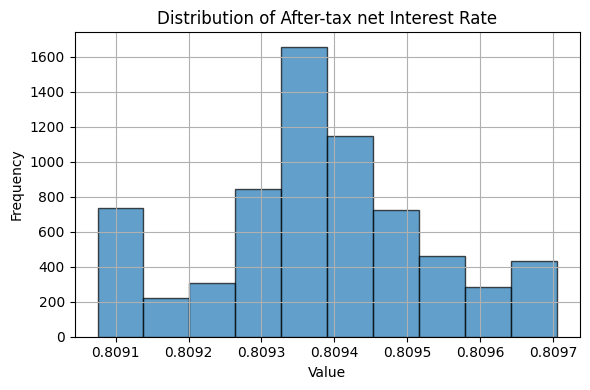

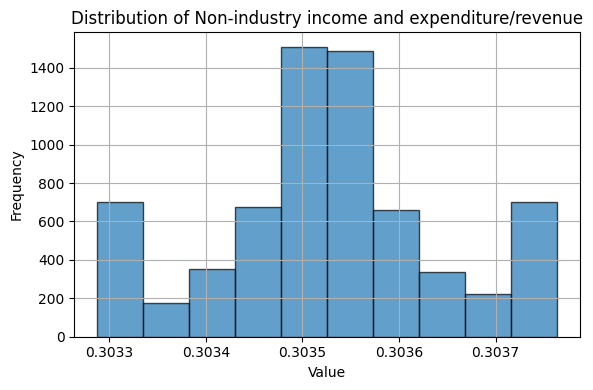

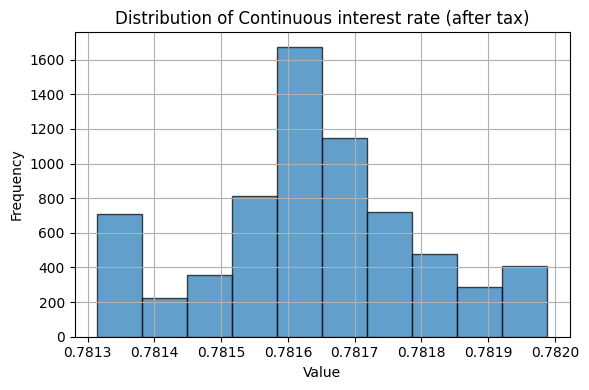

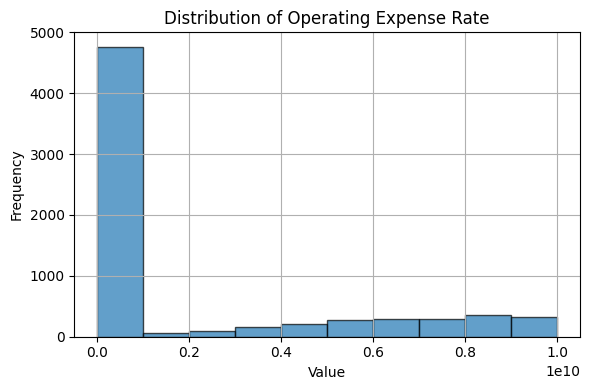

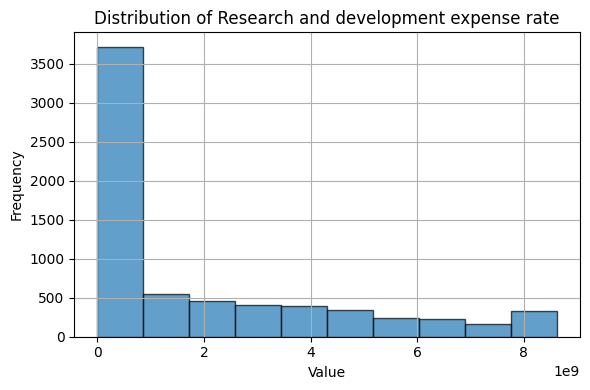

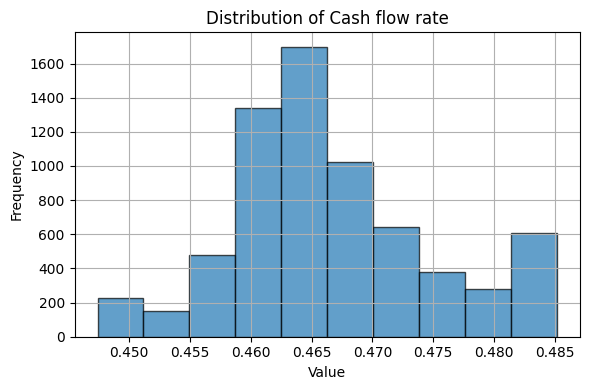

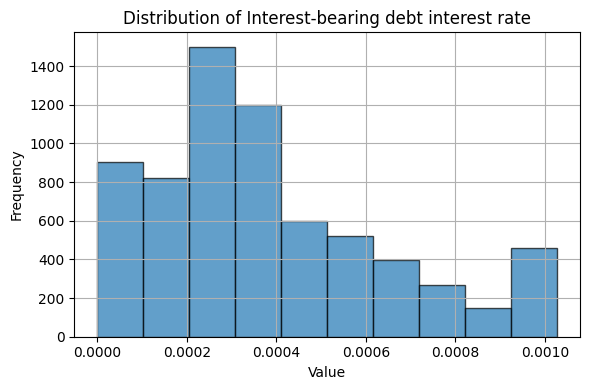

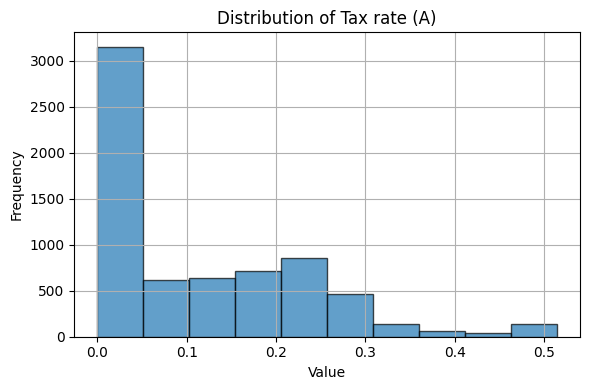

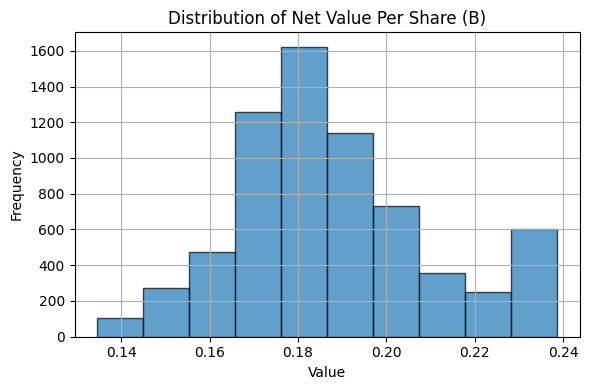

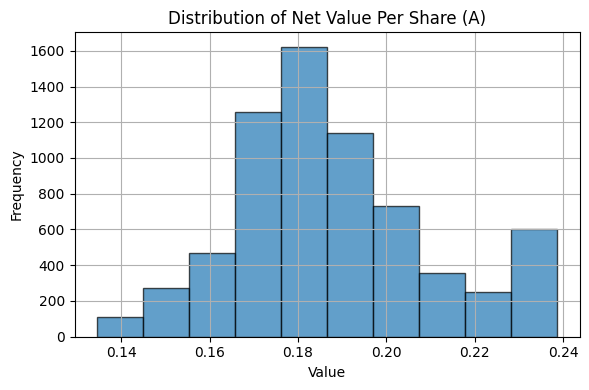

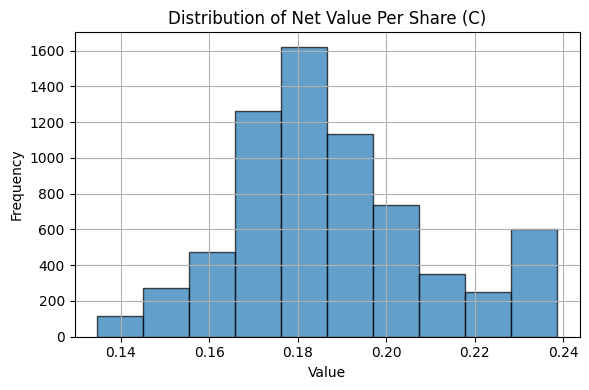

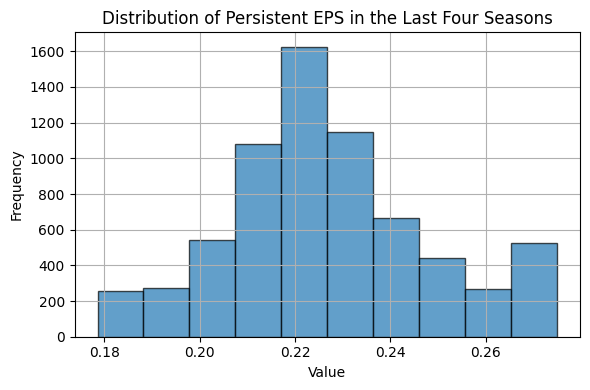

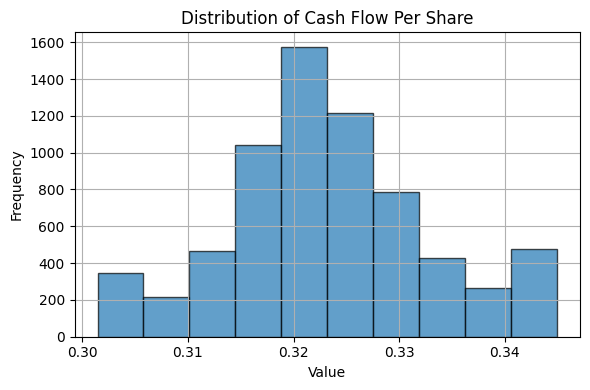

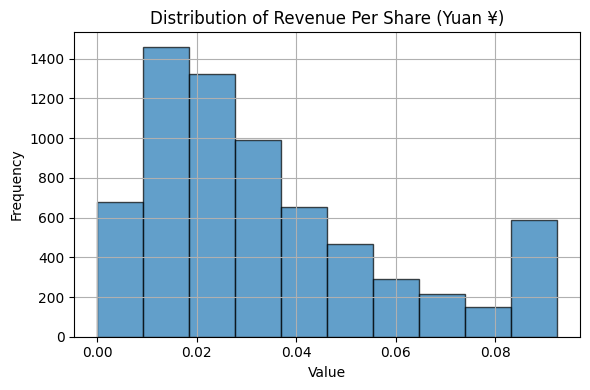

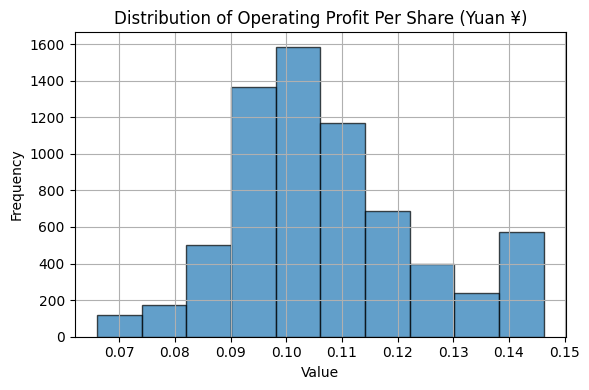

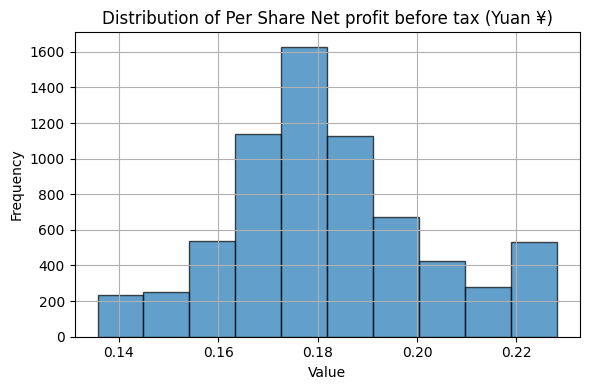

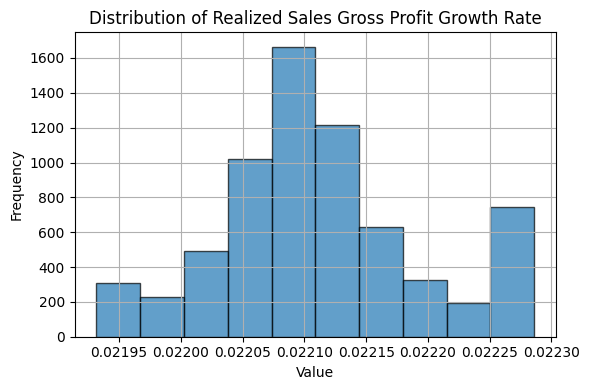

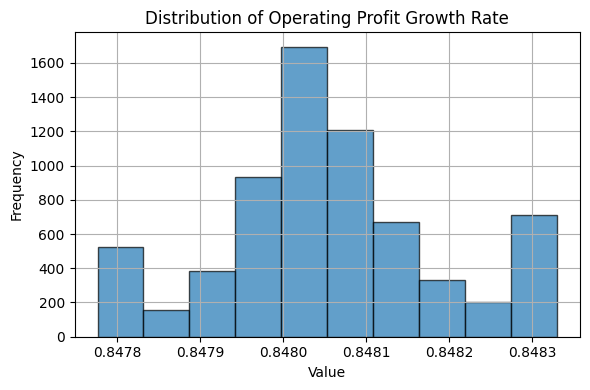

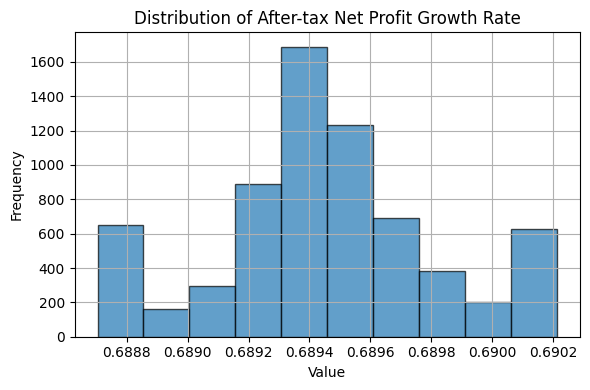

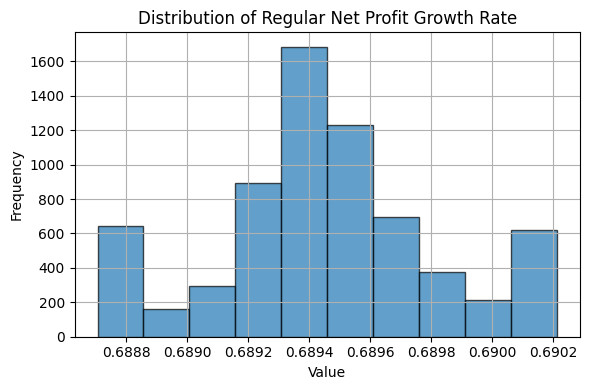

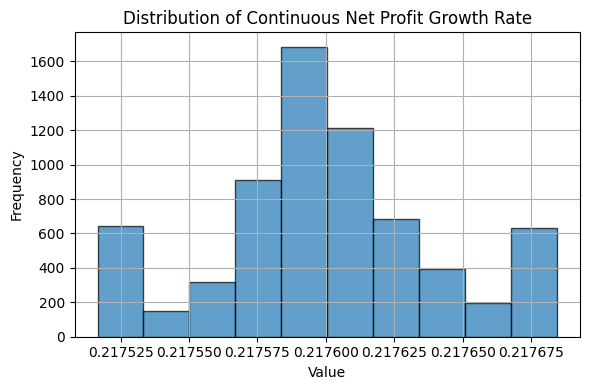

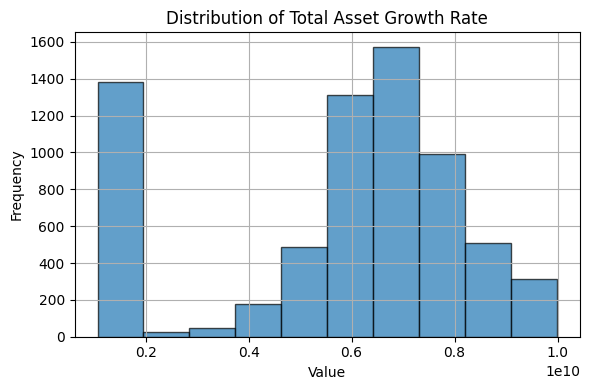

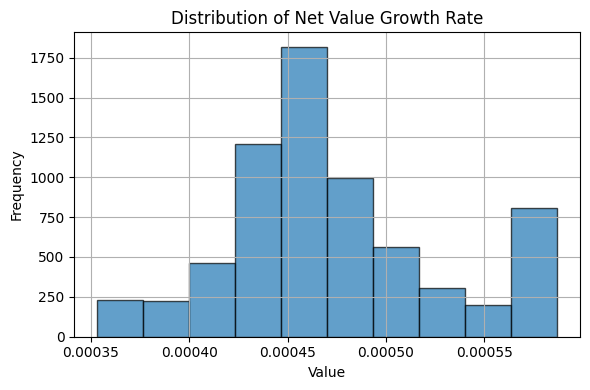

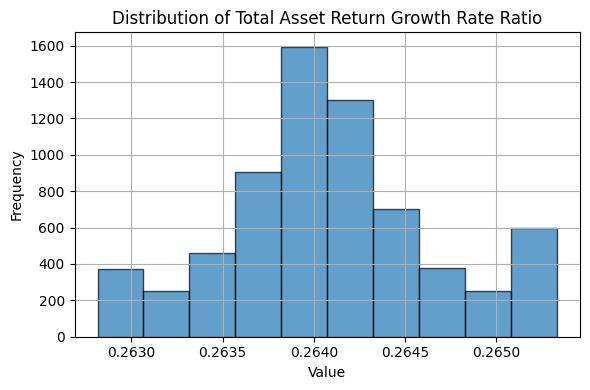

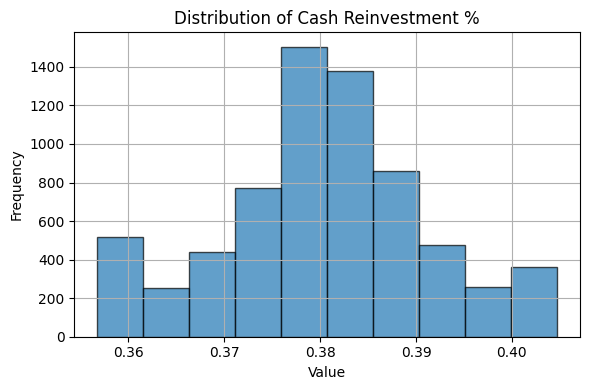

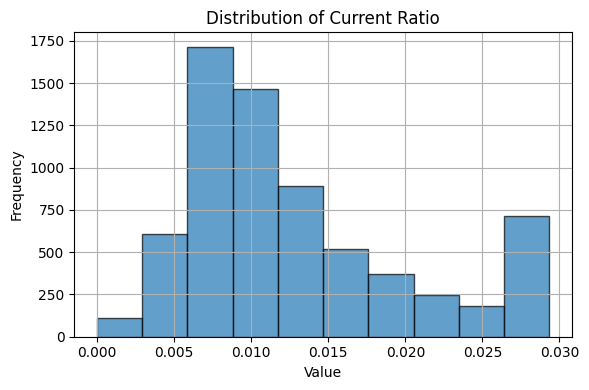

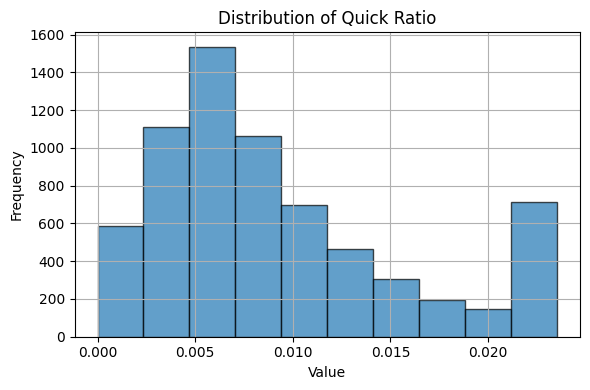

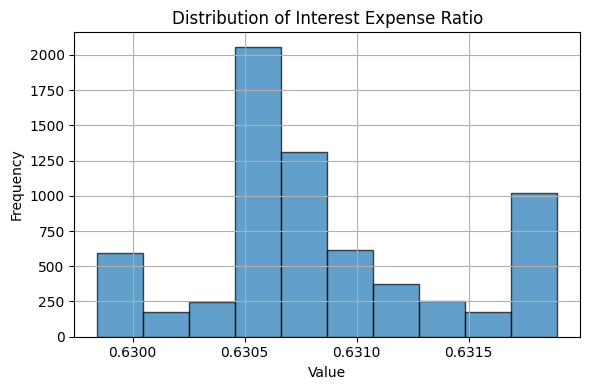

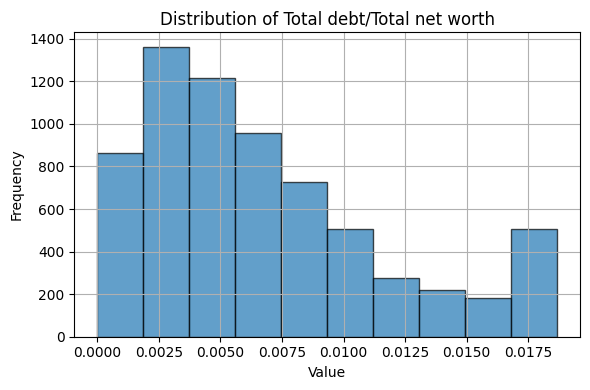

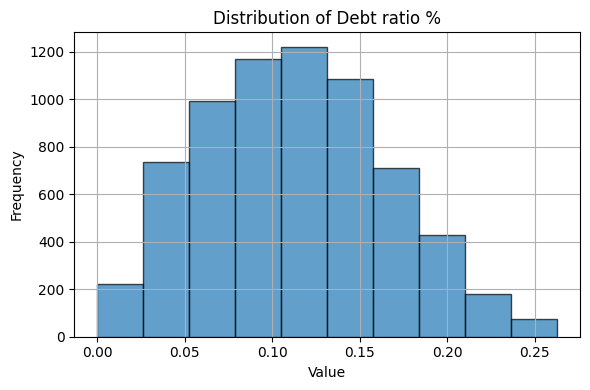

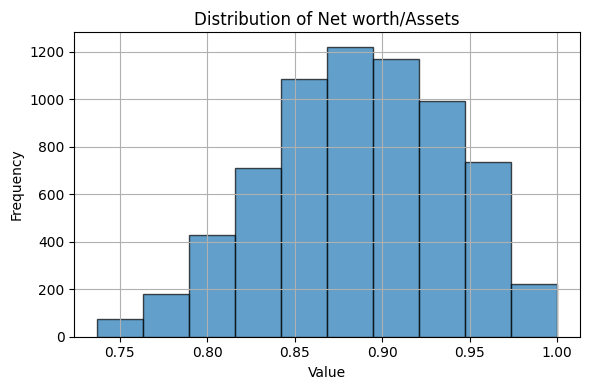

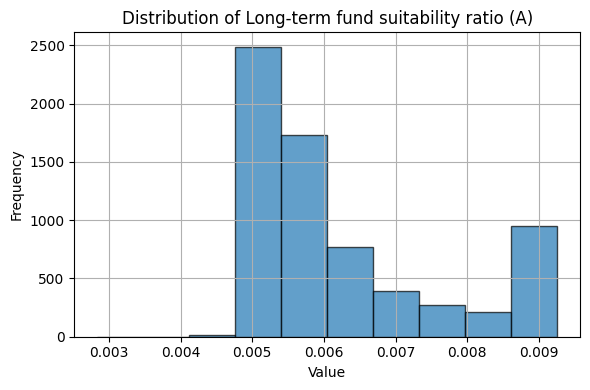

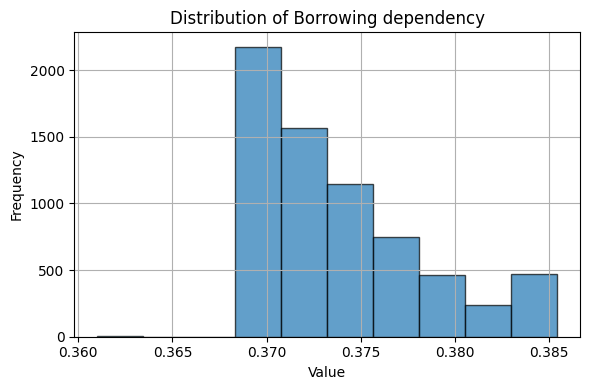

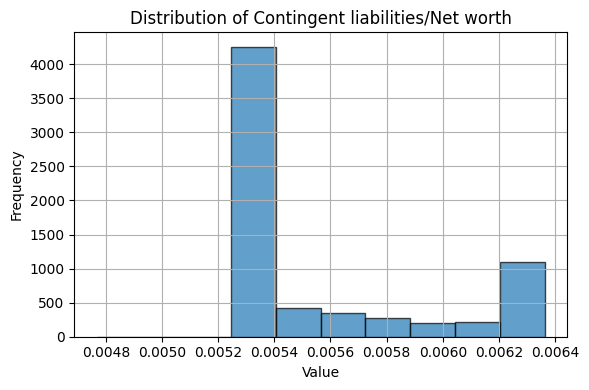

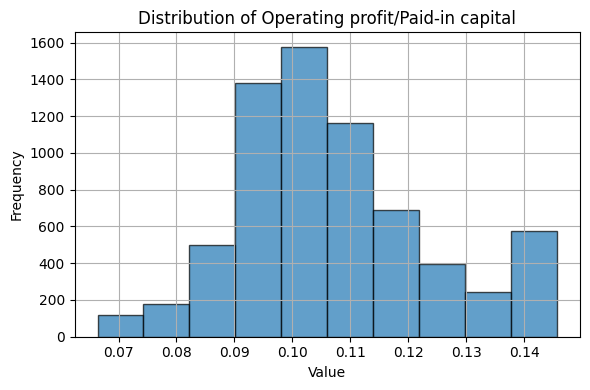

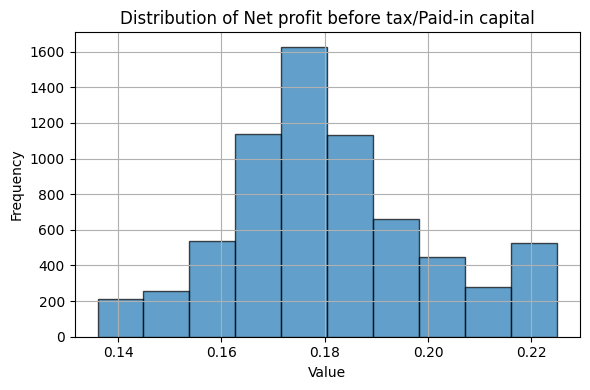

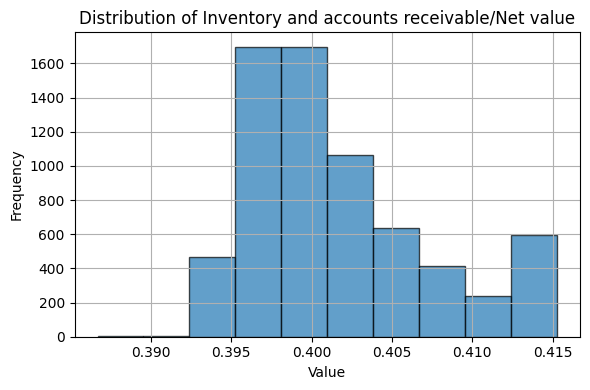

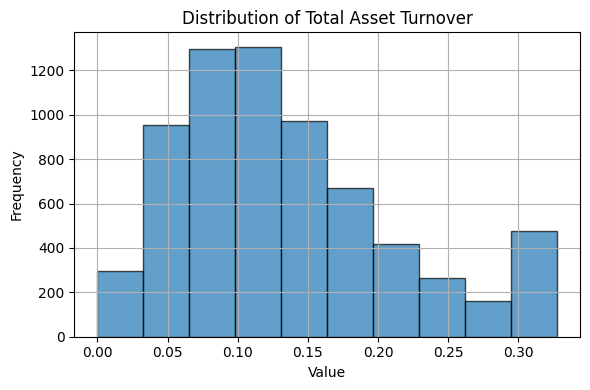

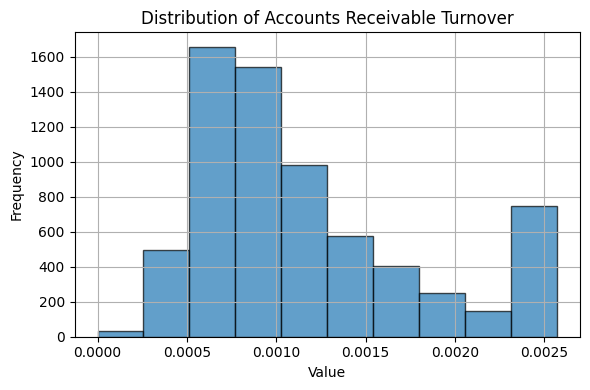

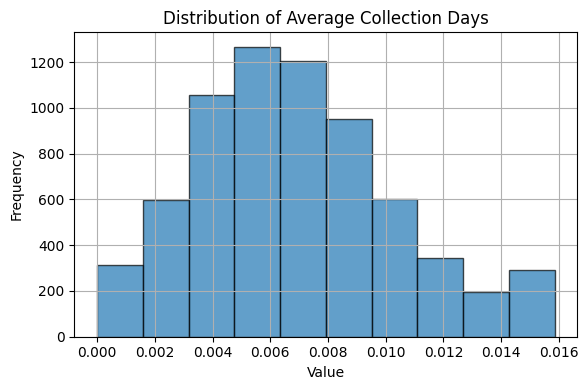

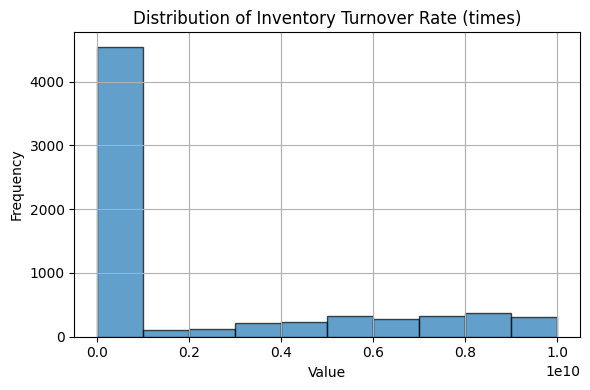

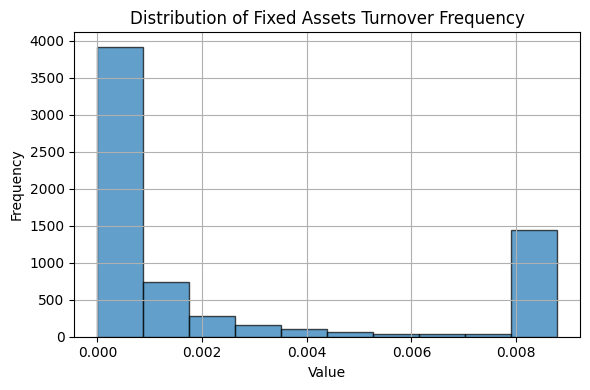

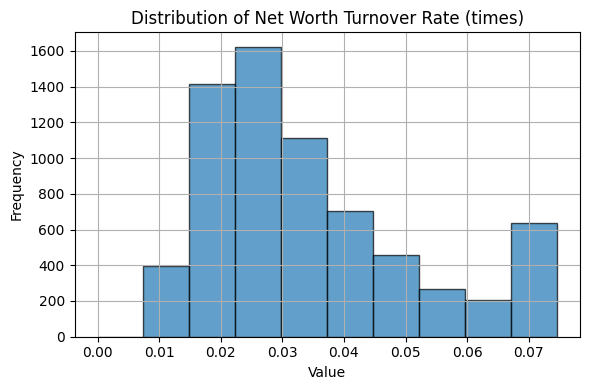

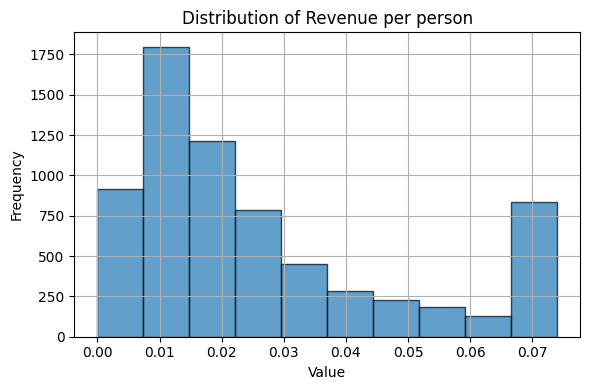

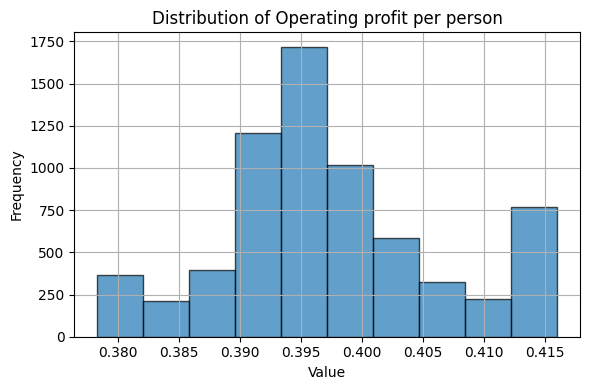

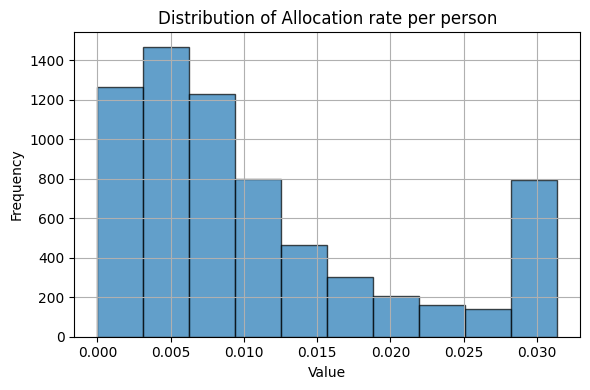

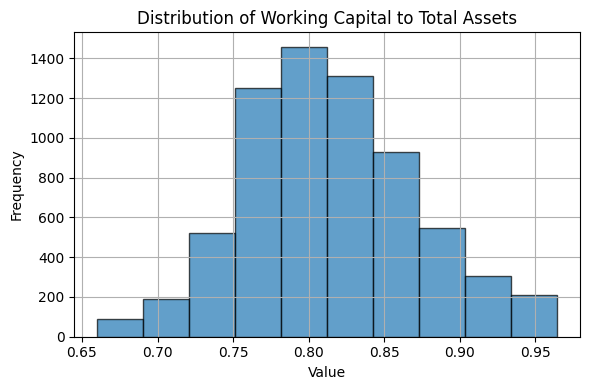

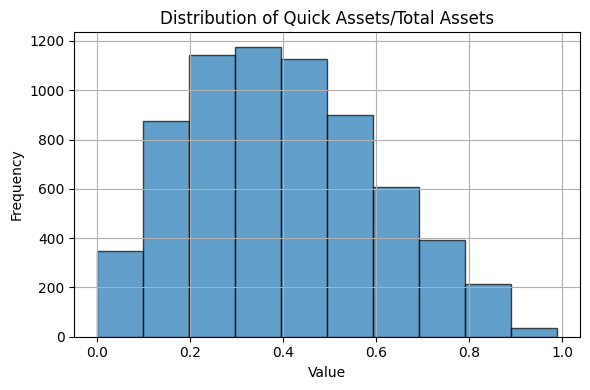

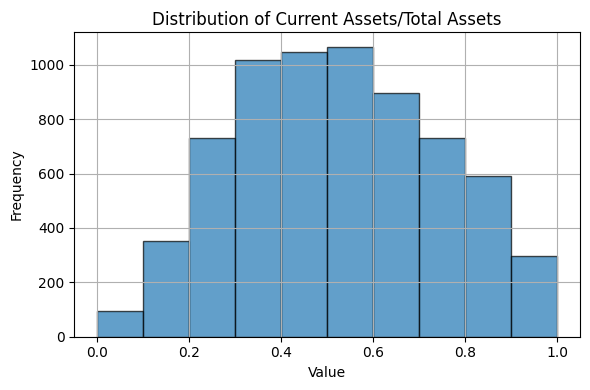

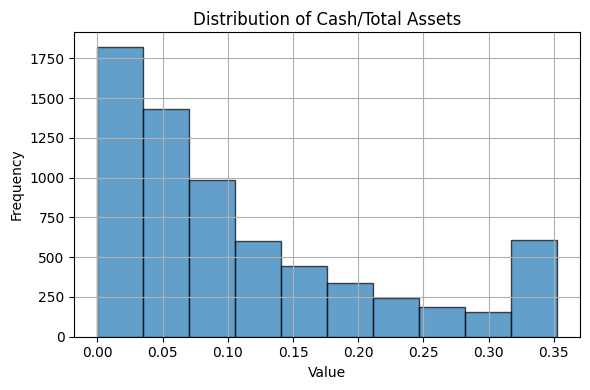

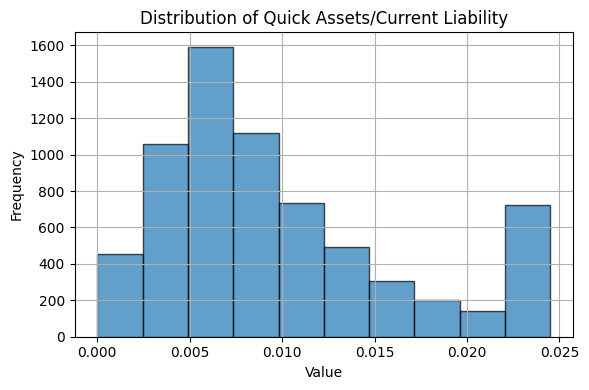

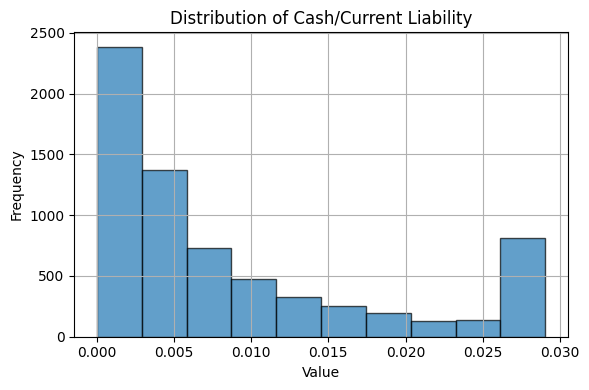

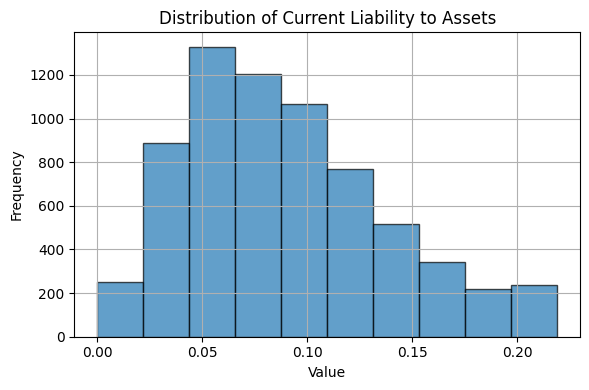

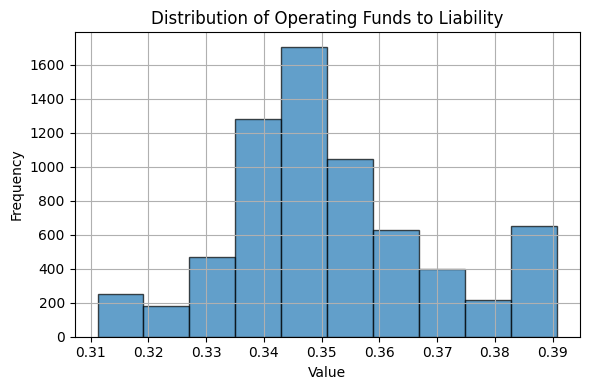

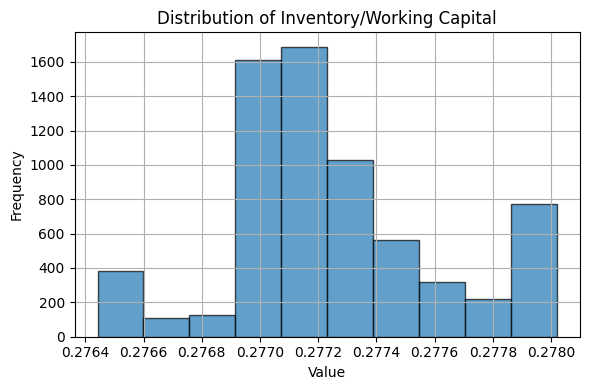

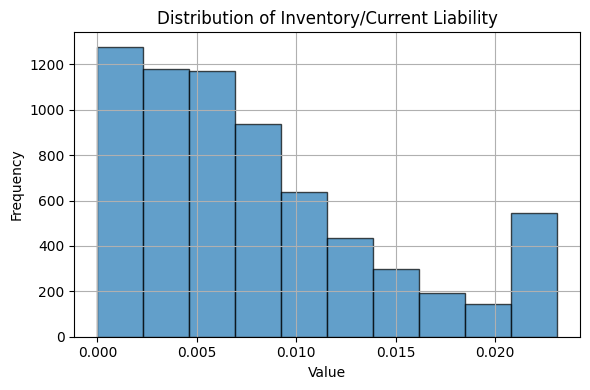

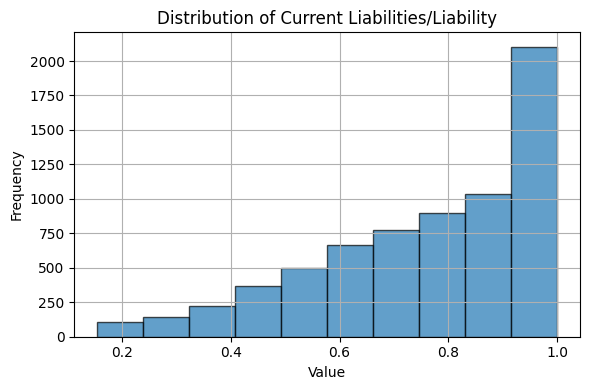

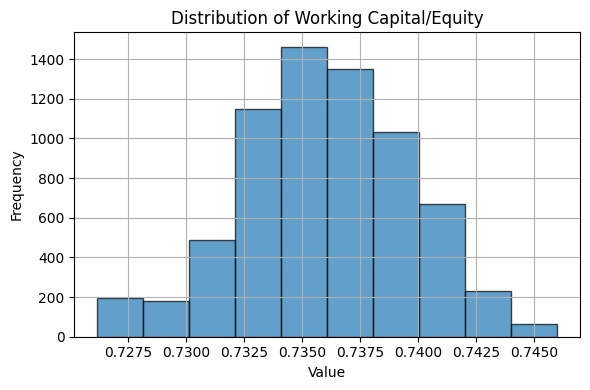

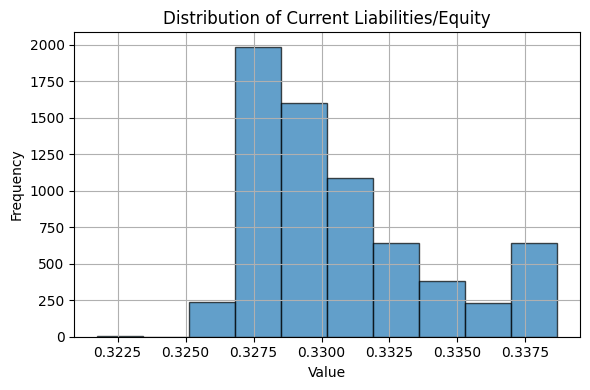

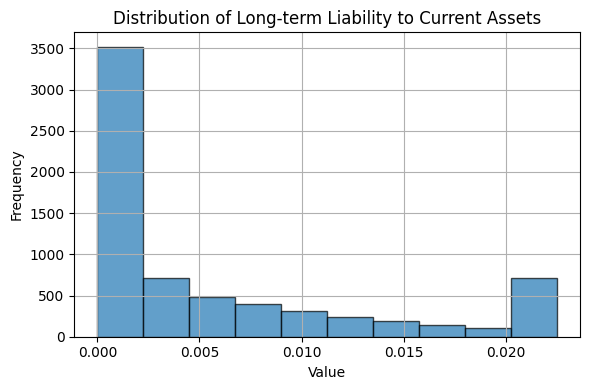

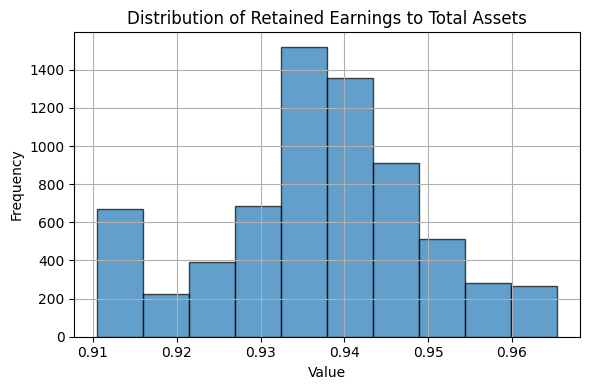

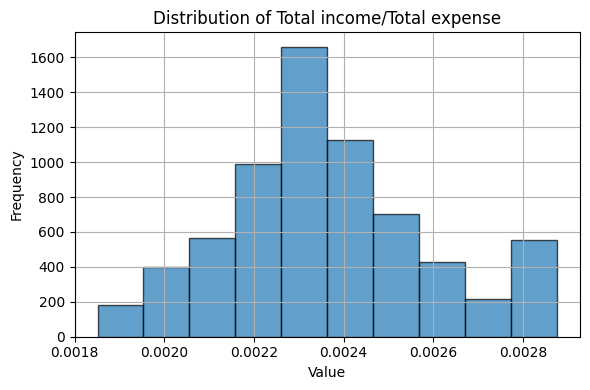

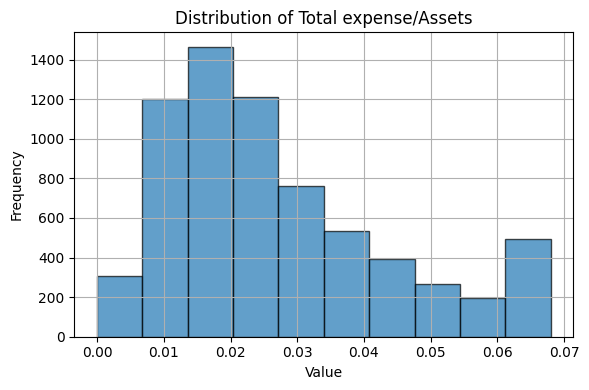

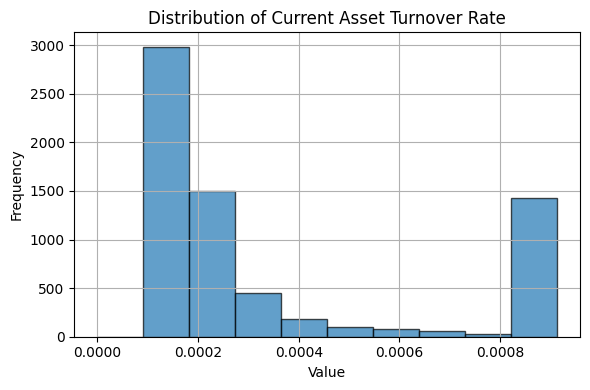

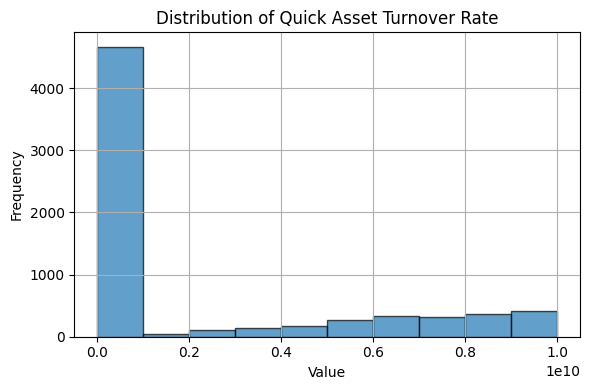

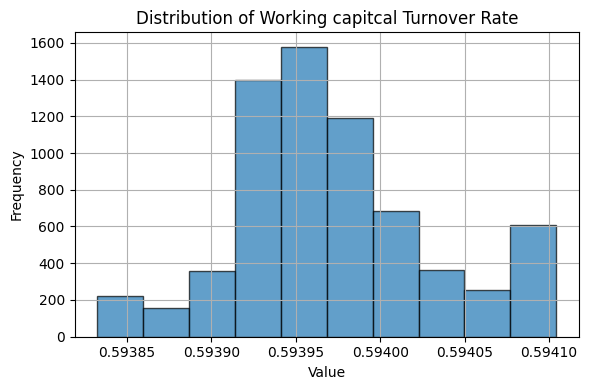

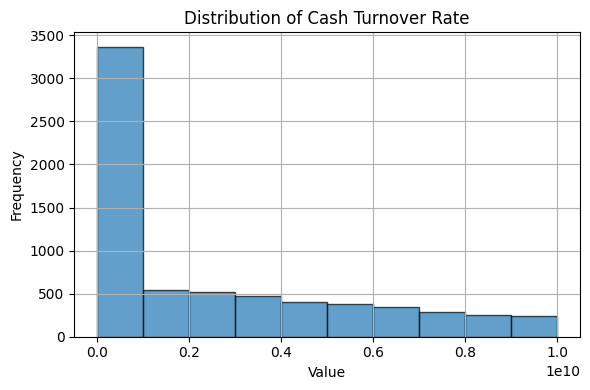

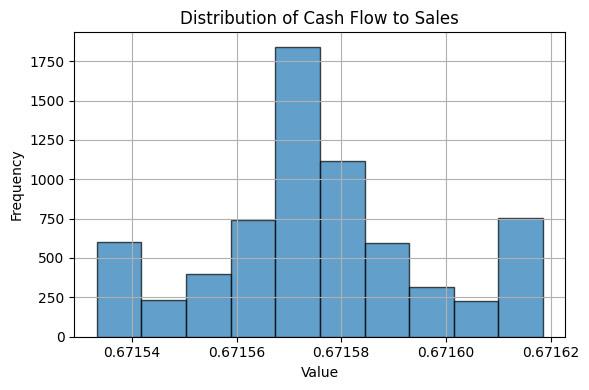

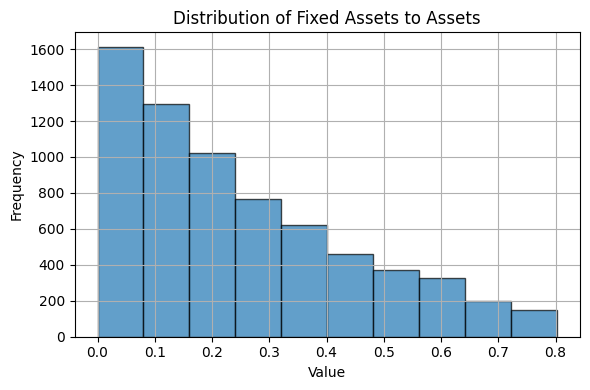

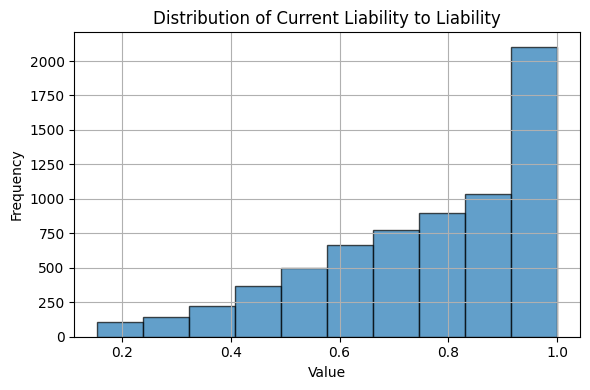

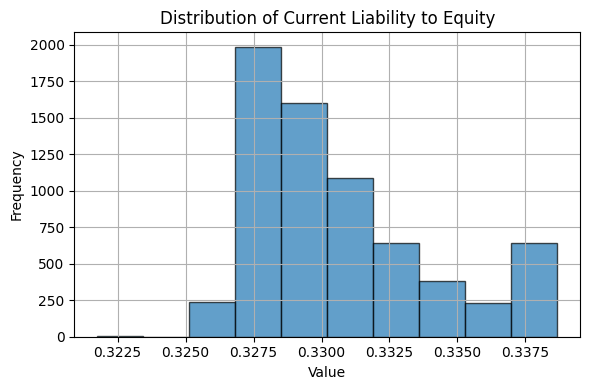

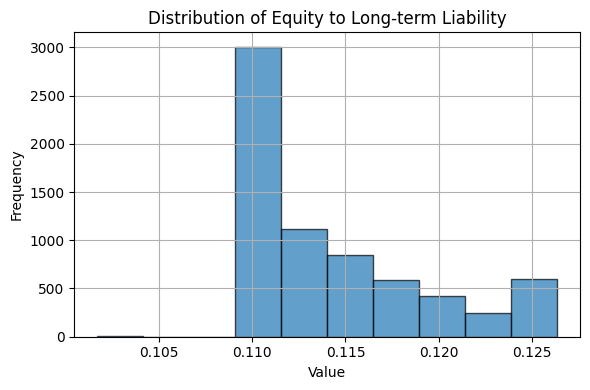

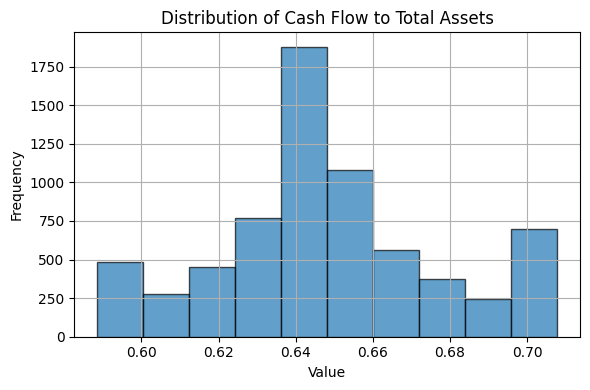

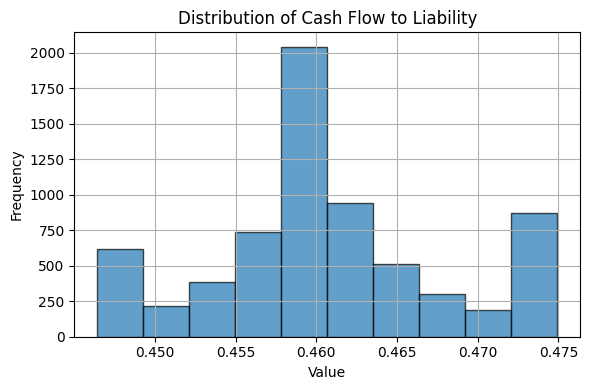

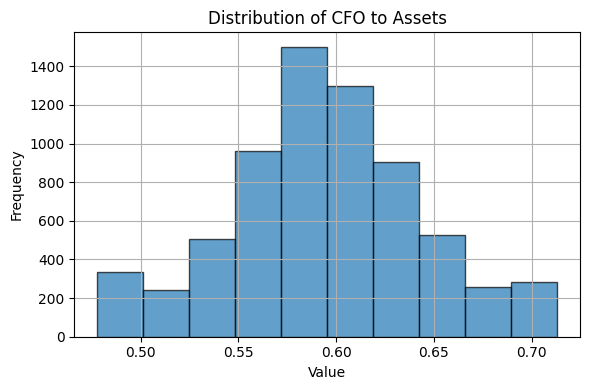

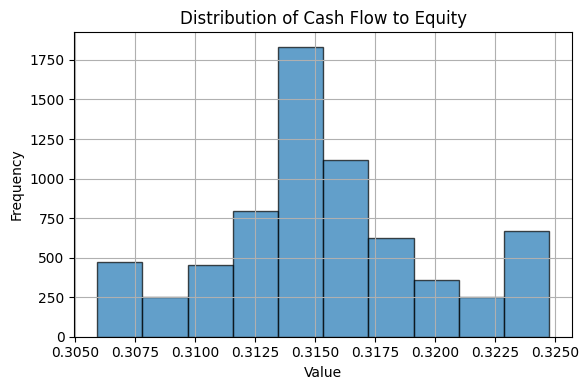

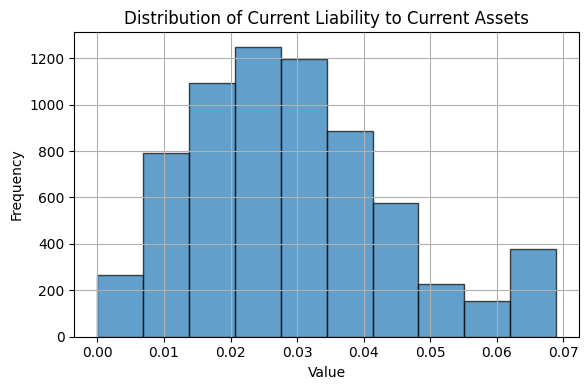

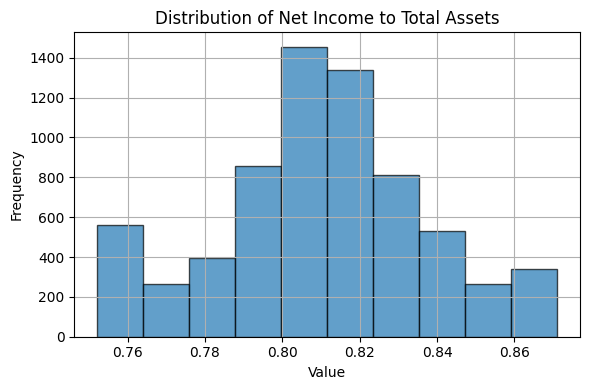

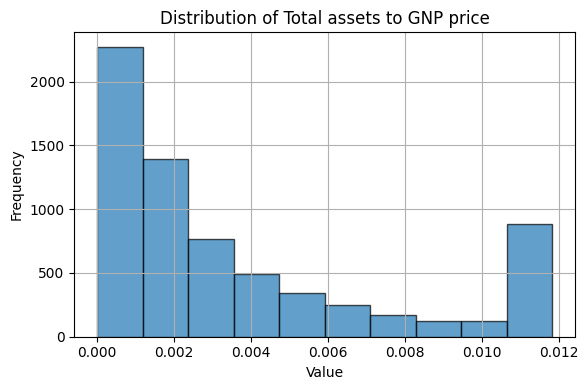

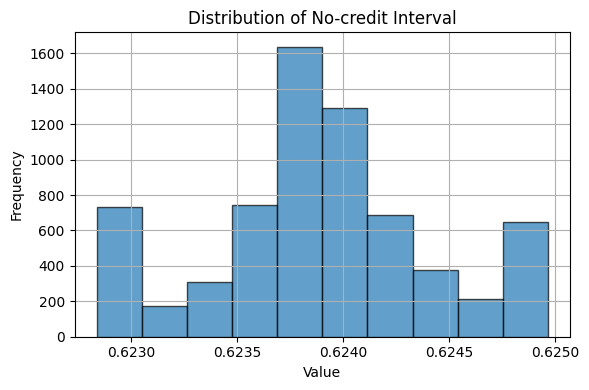

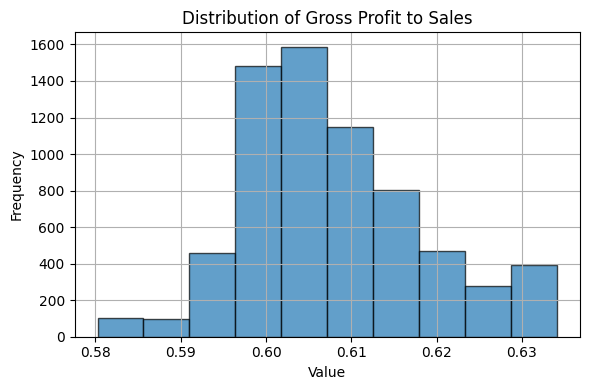

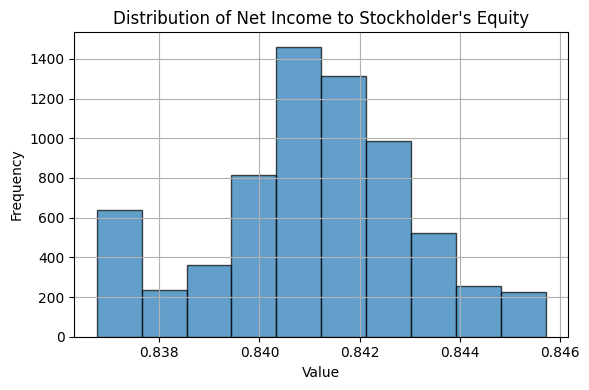

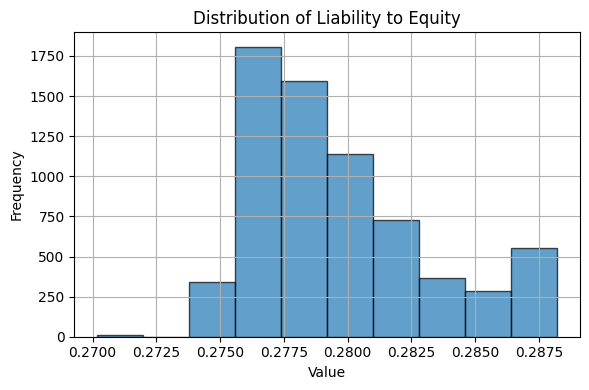

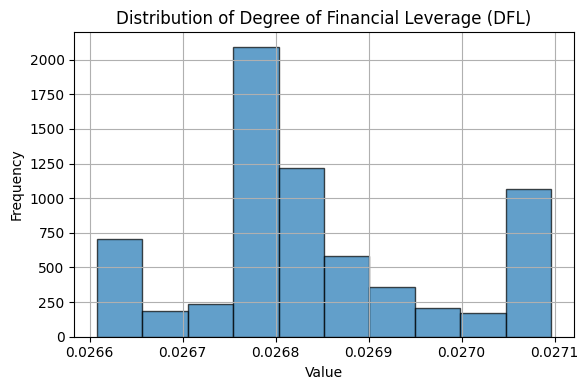

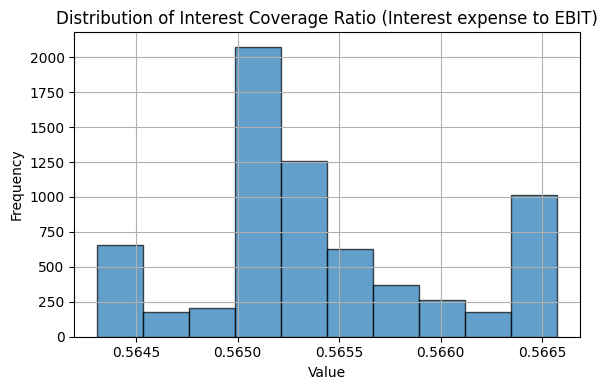

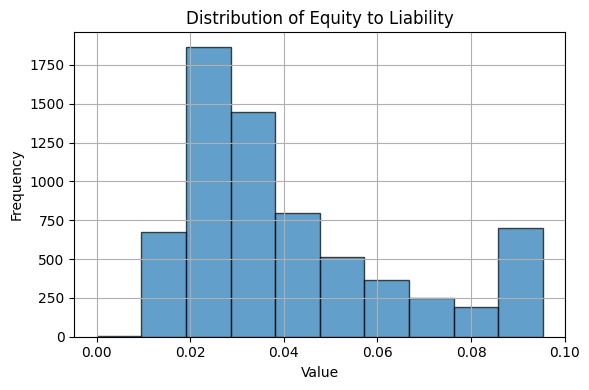

In [33]:
for col in df1.columns:
    plt.figure(figsize=(6, 4))  # Adjust figure size as needed
    plt.hist(df[col], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
## From distribution Plot we observed that the most of the columns are normally distributed

In [ ]:
# The data shows that the average 'Operating Gross Margin' and 'Realized Sales Gross Margin' between the two classes, 
# namely the non-bankrupt class and the bankrupt class, has very small differences. This means that on average, the operating profit margin and 
# sales profit margin generated by non-bankrupt companies and bankrupt companies are almost the same.

## Now we can check the relationship between Bankrupt and continous variable

##### For that i used pointbiserialr correlation coefficient

In [55]:
df1=df.drop(['Liability-Assets Flag','Net Income Flag'],axis=1)

In [61]:
# Initialize a list to store the results
results = []

# Calculate Point-Biserial correlation for each continuous feature
for col in df1.columns:
    if col != 'Bankrupt':
        corr, p_val = pointbiserialr(df['Bankrupt'], df[col])
        results.append({'Feature': col, 'Correlation': corr})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df.head(20))


                                              Feature  Correlation
0   ROA(C) before interest and depreciation before...    -0.239543
1              ROA(A) before interest and % after tax    -0.239500
2   ROA(B) before interest and depreciation after tax    -0.241993
3                              Operating Gross Margin    -0.140042
4                         Realized Sales Gross Margin    -0.139272
5                               Operating Profit Rate    -0.193856
6                           Pre-tax net Interest Rate    -0.238036
7                         After-tax net Interest Rate    -0.239484
8         Non-industry income and expenditure/revenue    -0.214507
9                Continuous interest rate (after tax)    -0.248585
10                             Operating Expense Rate    -0.006083
11              Research and development expense rate    -0.024764
12                                     Cash flow rate    -0.120201
13                Interest-bearing debt interest rate     0.09

In [60]:
## This is give the how bankrupt is rellated to our continous data

## Hypothesis Testing

In [27]:
## 1 Here we do hypothesis testing for Operating Gross Margin and Realized Sales Gross Margin 
## Here we check the average Operating Gross Margin and Realized Sales Gross Margin  are same or not 

In [28]:
x1=df['Operating Gross Margin']
x2=df['Realized Sales Gross Margin']

weightstats.ztest(x1,x2,value=0)

(0.12199417961900609, 0.9029036278324356)

##### Here p-value = 0.90 which is  p-value<0.05. It indicates that the mean of Operating Gross Margin and mean of Realized Sales Gross Margin are same

### Now we check the mean of  Quick Assets/Total Assets, Current Assets/Total Assets 

In [35]:
x1=df['Quick Assets/Total Assets']
x2=df['Current Assets/Total Assets']
weightstats.ztest(x1,x2,value=0)


(-33.92877900160208, 2.5080345806481248e-252)

##### Here p-value is greater than 0.05 thereforw we conclude that the the mean of  Quick Assets/Total Assets, Current Assets/Total Assets is not same

In [37]:
### Now we check the relation between  Bankrupt and Liability-Assets Flag,Net Income Flag for that i used chi square test
x=df[['Liability-Assets Flag','Net Income Flag']]
y=df.Bankrupt


In [38]:
chi_sqr, p_val = chi2(x,y)
df_chi2 = pd.DataFrame({'Feature':x.columns, 'Chi2 Value':chi_sqr, 'p_val':p_val})
df_chi2

Feature  Chi2 Value         p_val
0  Liability-Assets Flag  131.996215  1.499048e-30
1        Net Income Flag    0.000000  1.000000e+00

In [121]:
## Here Net Income Flag does not have relationship with Bankrupt so we can delete this column
df.drop('Net Income Flag',axis=1,inplace=True)


In [122]:
df.head()

Bankrupt  ROA(C) before interest and depreciation before interest  \
0         1                                           0.387973         
1         1                                           0.464291         
2         1                                           0.426071         
3         1                                           0.399844         
4         1                                           0.465022         

   ROA(A) before interest and % after tax  \
0                                0.455122   
1                                0.538214   
2                                0.499019   
3                                0.455122   
4                                0.538432   

   ROA(B) before interest and depreciation after tax  Operating Gross Margin  \
0                                           0.442034                0.601457   
1                                           0.516730                0.610235   
2                                           0.472295                0.601450   
3                                           0.457733                0.583541   
4                                           0.522298                0.598783   

   Realized Sales Gross Margin  Operating Profit Rate  \
0                     0.601457               0.998969   
1                     0.610235               0.998946   
2                     0.601364               0.998857   
3                     0.583541               0.998781   
4                     0.598783               0.998973   

   Pre-tax net Interest Rate  After-tax net Interest Rate  \
0                   0.797096                     0.809075   
1                   0.797380                     0.809301   
2                   0.797096                     0.809075   
3                   0.797096                     0.809075   
4                   0.797366                     0.809304   

   Non-industry income and expenditure/revenue  \
0                                     0.303288   
1                                     0.303556   
2                                     0.303288   
3                                     0.303350   
4                                     0.303475   

   Continuous interest rate (after tax)  Operating Expense Rate  \
0                              0.781314            1.256969e-04   
1                              0.781506            2.897851e-04   
2                              0.781314            2.361297e-04   
3                              0.781314            1.078888e-04   
4                              0.781550            7.890000e+09   

   Research and development expense rate  Cash flow rate  \
0                                    0.0        0.458143   
1                                    0.0        0.461867   
2                             25500000.0        0.458521   
3                                    0.0        0.465705   
4                                    0.0        0.462746   

   Interest-bearing debt interest rate  Tax rate (A)  Net Value Per Share (B)  \
0                             0.000725           0.0                 0.147950   
1                             0.000647           0.0                 0.182251   
2                             0.000790           0.0                 0.177911   
3                             0.000449           0.0                 0.154187   
4                             0.000686           0.0                 0.167502   

   Net Value Per Share (A)  Net Value Per Share (C)  \
0                 0.147950                 0.147950   
1                 0.182251                 0.182251   
2                 0.177911                 0.193713   
3                 0.154187                 0.154187   
4                 0.167502                 0.167502   

   Persistent EPS in the Last Four Seasons  Cash Flow Per Share  \
0                                 0.178548             0.311664   
1                                 0.208944             0.318137   
2                       

In [124]:
# Initialize dictionaries to store results
anova_results = {}
df1=df.drop(['Liability-Assets Flag'],axis=1)
# Perform ANOVA for each feature
# Initialize lists to store significant and not significant variables
significant_variables = []
not_significant_variables = []

# Perform ANOVA for each feature
for col in df1.columns:
    if col != 'Bankrupt':
        # Split the data into groups based on bankruptcy status
        group1 = df1[df1['Bankrupt'] == 0][col]
        group2 = df1[df1['Bankrupt'] == 1][col]

        # Perform ANOVA
        f_val, p_val = f_oneway(group1, group2)

        # Categorize based on p-value
        if p_val < 0.05:
            significant_variables.append(col)
        else:
            not_significant_variables.append(col)


d=pd.DataFrame({'Significant Variables': pd.Series(significant_variables),
    'Not Significant Variables': pd.Series(not_significant_variables)})
d

Significant Variables  \
0   ROA(C) before interest and depreciation before...   
1              ROA(A) before interest and % after tax   
2   ROA(B) before interest and depreciation after tax   
3                              Operating Gross Margin   
4                         Realized Sales Gross Margin   
5                               Operating Profit Rate   
6                           Pre-tax net Interest Rate   
7                         After-tax net Interest Rate   
8         Non-industry income and expenditure/revenue   
9                Continuous interest rate (after tax)   
10              Research and development expense rate   
11                                     Cash flow rate   
12                Interest-bearing debt interest rate   
13                                       Tax rate (A)   
14                            Net Value Per Share (B)   
15                            Net Value Per Share (A)   
16                            Net Value Per Share (C)   
17            Persistent EPS in the Last Four Seasons   
18                                Cash Flow Per Share   
19                         Revenue Per Share (Yuan ¥)   
20                Operating Profit Per Share (Yuan ¥)   
21           Per Share Net profit before tax (Yuan ¥)   
22            Realized Sales Gross Profit Growth Rate   
23                       Operating Profit Growth Rate   
24                   After-tax Net Profit Growth Rate   
25                     Regular Net Profit Growth Rate   
26                  Continuous Net Profit Growth Rate   
27                            Total Asset Growth Rate   
28                              Net Value Growth Rate   
29               Total Asset Return Growth Rate Ratio   
30                                Cash Reinvestment %   
31                                      Current Ratio   
32                                        Quick Ratio   
33                             Interest Expense Ratio   
34                         Total debt/Total net worth   
35                                       Debt ratio %   
36                                   Net worth/Assets   
37               Long-term fund suitability ratio (A)   
38                               Borrowing dependency   
39                   Contingent liabilities/Net worth   
40                   Operating profit/Paid-in capital   
41              Net profit before tax/Paid-in capital   
42        Inventory and accounts receivable/Net value   
43                               Total Asset Turnover   
44                            Average Collection Days   
45                    Fixed Assets Turnover Frequency   
46                                 Revenue per person   
47                        Operating profit per person   
48                         Allocation rate per person   
49                    Working Capital to Total Assets   
50                          Quick Assets/Total Assets   
51                        Current Assets/Total Assets   
52                                  Cash/Total Assets   
53                     Quick Assets/Current Liability   
54                             Cash/Current Liability   
55                        Current Liability to Assets   
56                       Operating Funds to Liability   
57                          Inventory/Working Capital   
58                        Inventory/Current Liability   
59                             Working Capital/Equity   
60                         Current Liabilities/Equity   
61              Long-term Liability to Current Assets   
62                  Retained Earnings to Total Assets   
63                         Total income/Total expense   
64                               Total expense/Assets   
65                        Current Asset Turnover Rate   
66                          Quick Asset Turnover Rate   
67                     Working capitcal Turnover Rate   
68                                 Cash Flow to Sales   
69                             Fixed Asset

######  By using ANOVA, we can identify which features have a statistically significant association with bankrupt

## Feature Engineering and Selection

In [125]:
df.Bankrupt.value_counts()

Bankrupt
0    6599
1     220
Name: count, dtype: int64

## Here our Data imbalanced So we can balance data

In [126]:
x=df.drop('Bankrupt',axis=1)
y=df.Bankrupt

In [127]:
# Apply SMOTE to the minority class
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)


In [128]:
print(x_resampled.shape,y_resampled.shape)

(13198, 94) (13198,)


In [129]:
y_resampled.value_counts()

Bankrupt
1    6599
0    6599
Name: count, dtype: int64

In [130]:
# If you have a dataset where one class (minority class) is significantly underrepresented compared to another class (majority class), 
# SMOTE (Synthetic Minority Over-sampling Technique) can be very effective in balancing the dataset. 
# SMOTE generates synthetic samples for the minority class to match the number of samples in the majority class, 
# thereby creating a more balanced distribution.

In [131]:
y_resampled[y_resampled==0].count()

6599

In [132]:
y_resampled.value_counts()

Bankrupt
1    6599
0    6599
Name: count, dtype: int64

In [143]:
x_resampled.isna().sum()

ROA(C) before interest and depreciation before interest    0
ROA(A) before interest and % after tax                     0
ROA(B) before interest and depreciation after tax          0
Operating Gross Margin                                     0
Realized Sales Gross Margin                                0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
After-tax net Interest Rate                                0
Non-industry income and expenditure/revenue                0
Continuous interest rate (after tax)                       0
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Interest-bearing debt interest rate                        0
Tax rate (A)                                               0
Net Value Per Share (B)                                    0
Net Value Per Share (A) 

#### Feature selection 

In [ ]:
## Now we want to select best features to our model so we can use feature selection techniques

##### Forward feature selection method 

In [135]:
log_clf = LogisticRegression()
sfs = SequentialFeatureSelector(log_clf, direction='forward')
sfs.fit(x_resampled,y_resampled)

array = sfs.get_support()
s1 = pd.Series(array,index=x_resampled.columns)
s1

ROA(C) before interest and depreciation before interest    False
ROA(A) before interest and % after tax                     False
ROA(B) before interest and depreciation after tax          False
Operating Gross Margin                                     False
Realized Sales Gross Margin                                False
Operating Profit Rate                                       True
Pre-tax net Interest Rate                                   True
After-tax net Interest Rate                                 True
Non-industry income and expenditure/revenue                 True
Continuous interest rate (after tax)                        True
Operating Expense Rate                                     False
Research and development expense rate                      False
Cash flow rate                                              True
Interest-bearing debt interest rate                         True
Tax rate (A)                                               False
Net Value Per Share (B)  

In [157]:
## Here it gives true means feature is important and false means feature is not important

In [151]:
d=s1[s1==True].index
d

Index(['Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Cash flow rate',
       'Interest-bearing debt interest rate',
       'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate',
       'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate',
       'Net Value Growth Rate', 'Total Asset Return Growth Rate Ratio',
       'Interest Expense Ratio', 'Total debt/Total net worth',
       'Long-term fund suitability ratio (A)', 'Borrowing dependency',
       'Contingent liabilities/Net worth',
       'Inventory and accounts receivable/Net value',
       'Accounts Receivable Turnover', 'Average Collection Days',
       'Fixed Assets Turnover Frequency', 'Net Worth Turnover Rate (times)',
       'Alloca

In [152]:
x_forward=x_resampled[d]

In [153]:
x=x_forward
y=y_resampled

In [154]:
x.shape

(13198, 47)

In [156]:
y.shape

(13198,)

In [ ]:
## Recursive Feature Elimination
s1 = pd.Series(array,index=x.columns)
s1

## Model Building

##### Now we can split data into train test split 

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=10,stratify=y)

In [184]:
y_train

6455     0
3084     0
8141     1
2991     0
11599    1
        ..
5364     0
5874     0
9800     1
7283     1
8796     1
Name: Bankrupt, Length: 9238, dtype: int64

##### Now we can build the Logistic regression model

In [185]:
log_clf = LogisticRegression(multi_class='ovr')
log_clf.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [186]:
type(y_train)
type(y_pred_train)

pandas.core.series.Series

In [200]:
## 2. Training Data evaluation
y_pred_train = log_clf.predict(x_train)
y_pred_prob = log_clf.predict_proba(x_test)

acc_score = accuracy_score(y_train,y_pred_train)
print("Accuracy Score is :",acc_score)

confusion_mat = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix :\n",confusion_mat)

clf_report = classification_report(y_train,y_pred_train)
print("Classification Report :\n",clf_report)

Accuracy Score is : 0.8865555315003247
Confusion Matrix :
 [[3926  693]
 [ 355 4264]]
Classification Report :
               precision    recall  f1-score   support

           0       0.92      0.85      0.88      4619
           1       0.86      0.92      0.89      4619

    accuracy                           0.89      9238
   macro avg       0.89      0.89      0.89      9238
weighted avg       0.89      0.89      0.89      9238



In [199]:
## 1. Testing Data evaluation
y_pred = log_clf.predict(x_test)
y_pred_prob = log_clf.predict_proba(x_test)

acc_score = accuracy_score(y_test,y_pred)
print("Accuracy Score is :",acc_score)

confusion_mat = confusion_matrix(y_test,y_pred)
print("Confusion Matrix :\n",confusion_mat)

clf_report = classification_report(y_test,y_pred)
print("Classification Report :\n",clf_report)

Accuracy Score is : 0.8883838383838384
Confusion Matrix :
 [[1706  274]
 [ 168 1812]]
Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.86      0.89      1980
           1       0.87      0.92      0.89      1980

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960



In [215]:
x_train=sm.add_constant(x_train,prepend=False)

In [216]:
model_sm = sm.OLS(y_train,x_train).fit()

In [217]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               Bankrupt   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     369.0
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        20:16:02   Log-Likelihood:                -1807.8
No. Observations:                9238   AIC:                             3712.
Df Residuals:                    9190   BIC:                             4054.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [244]:
d=model_sm.pvalues
significan_variables=list(d[d<0.05].index)

32

In [243]:
#### These  31 variable are significant in our model
significan_variables

['Pre-tax net Interest Rate',
 'After-tax net Interest Rate',
 'Non-industry income and expenditure/revenue',
 'Continuous interest rate (after tax)',
 'Interest-bearing debt interest rate',
 'Realized Sales Gross Profit Growth Rate',
 'After-tax Net Profit Growth Rate',
 'Regular Net Profit Growth Rate',
 'Continuous Net Profit Growth Rate',
 'Net Value Growth Rate',
 'Total Asset Return Growth Rate Ratio',
 'Total debt/Total net worth',
 'Long-term fund suitability ratio (A)',
 'Borrowing dependency',
 'Inventory and accounts receivable/Net value',
 'Average Collection Days',
 'Net Worth Turnover Rate (times)',
 'Allocation rate per person',
 'Inventory/Working Capital',
 'Working Capital/Equity',
 'Current Liabilities/Equity',
 'Total income/Total expense',
 'Total expense/Assets',
 'Working capitcal Turnover Rate',
 'Cash Flow to Sales',
 'Cash Flow to Liability',
 'Current Liability to Current Assets',
 'Liability-Assets Flag',
 "Net Income to Stockholder's Equity",
 'Liability to

In [247]:
d1=model_sm.pvalues
insignifican_variables=list(d[d>0.05].index)

16

In [249]:
## There are 16 variables are insignificant in our data
insignifican_variables

['Operating Profit Rate',
 'Cash flow rate',
 'Persistent EPS in the Last Four Seasons',
 'Cash Flow Per Share',
 'Operating Profit Growth Rate',
 'Interest Expense Ratio',
 'Contingent liabilities/Net worth',
 'Accounts Receivable Turnover',
 'Fixed Assets Turnover Frequency',
 'Inventory/Current Liability',
 'Current Asset Turnover Rate',
 'Equity to Long-term Liability',
 'Cash Flow to Equity',
 'No-credit Interval',
 'Interest Coverage Ratio (Interest expense to EBIT)',
 'Equity to Liability']